In [1]:
#import all required files
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle 
import matplotlib.patches as patches

In [2]:
#import 1000 random data over the box
import random
xdata=np.zeros(1000)
ydata=np.zeros(1000)
for i in range(1000):
   xdata[i] = random.uniform(-2, 2)
   ydata[i]=random.uniform(-2, 2)

In [3]:
def create_line(x1,x2,y1,y2):
  m=(y2-y1)/(x2-x1)
  c=y2-m*x2
  return m,c


In [4]:
xx=[-.6,1.5]      #take two random points from the box and draw a line
yy=[-2,2]
#xx=[random.uniform(-2, 2),random.uniform(-2, 2)]   #if anyone want to choose totally random values that could be erronous for the model
#yy=[random.uniform(-2, 2),random.uniform(-2, 2)]
m,c=create_line(xx[0],xx[1],yy[0],yy[1])


In [5]:
#thresholding 
yt=np.zeros(1000)
ythres=np.zeros(1000)
truth_table=[]
for i in range(1000):
      ythres[i]=np.multiply(xdata[i],m)+c
      if (ydata[i]<ythres[i]):
        yt[i]=0
      else:
        yt[i]=1
      truth_table.append([xdata[i],yt[i]])

In [ ]:
truth_table

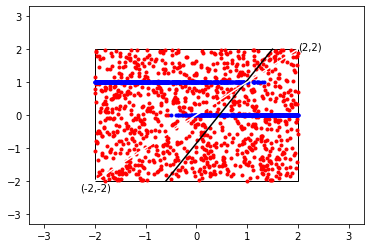

In [6]:
fig, ax = plt.subplots()
#fig=plt.figure()
ax.plot(xdata,ydata,'r.')
#ax.plot(xdata,ydata,'g.')
ax.plot(xdata,yt,'b.')
#ax.plot(xdata,y_pred,'b.')
ax.plot(xx,yy,'black')
ax.plot([-3,3],[-3,3],color='white')

ax.add_patch(
     patches.Rectangle(
        (-2, -2),
        4,
        4,
         fc ='none',
        edgecolor = 'black',
        facecolor = 'white',
        fill=False
     ) )

ax.annotate('(2,2)',xy=(2,2))
ax.annotate('(-2,-2)',xy=(-2.3,-2.3))
plt.show()

In [7]:
#Pick the random weights (w0,w1,w2)
import random
w0=random.uniform(-1, 1)
w1=random.uniform(-1, 1)
#w2=random.uniform(-1, 1)
w=np.array([w0,w1])
print(w)

[ 0.98488374 -0.12199411]


In [8]:
w_initial=[w0, w1]

In [9]:
#calculate the slope 'm' and co-efficient 'c' of y=mx+c
def points(X,W):
  c=W[0]
  m=W[1]
  y=np.multiply(X,m)+c
  return y

In [10]:
#check the weights and find if it reach the expected output values
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [ ]:
#truth_table=list(truth_table)
#truth_table


In [ ]:
#Check if initial weight values can predict the output
for row in truth_table:
  prediction=predict(row,w) #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  #e=row[-1]-prediction
  #print(e)

In [12]:
# Estimate Perceptron weights  calculating epoch independently and converged
def train_weights(train, l_rate, n_epoch,weights):
	#weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		#error=100
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	#print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights, sum_error

In [13]:
#calculate the weights using Stochastic gradient descent using number of epoch=20
l_rate = .5
n_epoch = 500 #My all results were right within epoch=20, if needed please increase the number of epoch
weights,error = train_weights(truth_table, l_rate, n_epoch,w)
#print(weights)
print('error value',error)

error value 156.0


In [ ]:
#Check if calculated weight values can predict the output
i=0
y_pred=np.zeros(1000)
for row in truth_table:
  prediction=predict(row,weights)
  y_pred[i]=prediction
  i=i+1
  #y_pred[i]=prediction #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  #e=row[-1]-prediction
  #print(e)

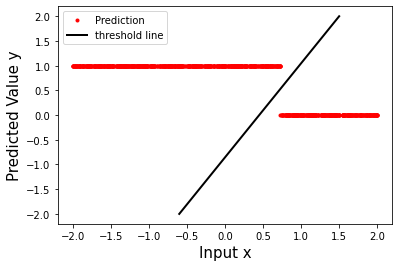

In [15]:
#plt.plot(xdata,yt,'r.')
plt.plot(xdata,y_pred,'r.',label='Prediction')
plt.plot(xx,yy,color='black',linewidth=2,label='threshold line')
plt.xlabel('Input x',fontsize=15)
plt.ylabel('Predicted Value y',fontsize=15)
plt.legend()
plt.show()
